In [1]:
# Necessary libraries
import tensorflow as tf
import cv2
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, UpSampling2D
import random

Using TensorFlow backend.


In [2]:
random.seed(14)

### Exercise 1.1: Train-test splits and Normalization

In [3]:
# Loading the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [4]:
# Normalizing the data
x_train_input = np.divide(x_train, 255)
x_test_input = np.divide(x_test, 255)

In [5]:
# Autoencoder
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(12, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(12, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding="same"))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 16, 16, 16)        0         
______________________________________

### Exercise 1.2: Training the model

In [6]:
# Training the model
model.fit(x_train_input, x_train_input, validation_split=1/9, epochs=10)


Train on 44444 samples, validate on 5556 samples
Epoch 1/10
44444/44444 [==============================] - 55s 1ms/step - loss: 0.0123 - val_loss: 0.0066
Epoch 2/10
44444/44444 [==============================] - 56s 1ms/step - loss: 0.0061 - val_loss: 0.0057
Epoch 3/10
44444/44444 [==============================] - 52s 1ms/step - loss: 0.0054 - val_loss: 0.0052
Epoch 4/10
44444/44444 [==============================] - 52s 1ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 5/10
44444/44444 [==============================] - 53s 1ms/step - loss: 0.0048 - val_loss: 0.0046
Epoch 6/10
44444/44444 [==============================] - 52s 1ms/step - loss: 0.0046 - val_loss: 0.0049
Epoch 7/10
44444/44444 [==============================] - 53s 1ms/step - loss: 0.0045 - val_loss: 0.0043
Epoch 8/10
44444/44444 [==============================] - 54s 1ms/step - loss: 0.0043 - val_loss: 0.0042
Epoch 9/10
44444/44444 [==============================] - 54s 1ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch

In [7]:
# Test error
result = model.evaluate(x_test_input, x_test_input)
result

10000/10000 [==============================] - 3s 256us/step


0.0041450805895030494

In [8]:
# Predicting for the inputs
x_pred = model.predict(x_test_input)
x_pred = np.multiply(x_pred, 255)
x_pred = x_pred.astype(int)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


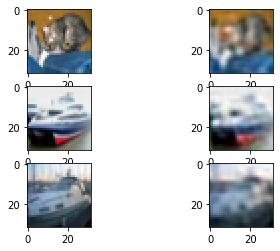

In [9]:
# Displaying the reconstructions
fig, axs = plt.subplots(3, 2)
axs[0, 0].imshow(x_test[0])
axs[1, 0].imshow(x_test[1])
axs[2, 0].imshow(x_test[2])

axs[0, 1].imshow(x_pred[0])
axs[1, 1].imshow(x_pred[1])
axs[2, 1].imshow(x_pred[2])

### Exercise 2.1: Size of the 2-D convolutional layer

C((((W-K+2P)/S) + 1)**2)

W – Input volume. K – Kernel size. P – Padding. S – Stride. C – Number of channels.

#### Size of the first convolutional layer

In [10]:
W = 32
K = 3
P = 1
S = 1
C = 8

In [11]:
s1 = C*((((W-K+2*P)/S) + 1)**2)
s1

8192.0

#### Size of the second convolutional layer

In [12]:
W = 16
K = 3
P = 1
S = 1
C = 12

In [13]:
s2 = C*((((W-K+2*P)/S) + 1)**2)
s2

3072.0

#### Size of the latent space representation 

In [14]:
W = 8
K = 3
P = 1
S = 1
C = 16

In [15]:
s3 = C*((((W-K+2*P)/S) + 1)**2)
s3

1024.0

### Exercise 2.2: Other architecture attempts

#### Default structure

In [16]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(12, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(12, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding="same"))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 12)        876       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 8, 8, 16)          1744      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 12)       

In [17]:
model.fit(x_train_input, x_train_input, validation_split=1/9, epochs=1)

Train on 44444 samples, validate on 5556 samples
Epoch 1/1
44444/44444 [==============================] - 54s 1ms/step - loss: 0.0113 - val_loss: 0.0065


In [18]:
# Latent space for this configuration
W = 8
K = 3
P = 1
S = 1
C = 16

s3 = C*((((W-K+2*P)/S) + 1)**2)
s3


1024.0

#### Fewer intermediate layers

In [19]:
model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(12, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding="same"))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 12)        876       
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 32, 32, 12)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 3)         327       
Total params: 1,427
Trainable params: 1,427
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
model.fit(x_test_input, x_test_input, validation_split=1/9, epochs=1)

Train on 8888 samples, validate on 1112 samples
Epoch 1/1
8888/8888 [==============================] - 9s 989us/step - loss: 0.0172 - val_loss: 0.0059


In [21]:
# Latent space for this configuration
W = 16
K = 3
P = 1
S = 1
C = 12

s3 = C*((((W-K+2*P)/S) + 1)**2)
s3

3072.0

#### Different number of channels

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding="same"))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
up_sampling2d_6 (UpSampling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 16, 16, 64)       

In [23]:
model.fit(x_test_input, x_test_input, validation_split=1/9, epochs=1)

Train on 8888 samples, validate on 1112 samples
Epoch 1/1
8888/8888 [==============================] - 51s 6ms/step - loss: 0.0123 - val_loss: 0.0054


In [24]:
# Latent space for this configuration
W = 8
K = 3
P = 1
S = 1
C = 128

s3 = C*((((W-K+2*P)/S) + 1)**2)
s3

8192.0

#### Different filter sizes

In [25]:
model = Sequential()
model.add(Conv2D(8, (5, 5), activation='relu', padding="same", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(12, (5, 5), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(16, (5, 5), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(12, (5, 5), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(3, (5, 5), activation='relu', padding="same"))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 8)         608       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 12)        2412      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 12)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 8, 8, 16)          4816      
_________________________________________________________________
up_sampling2d_8 (UpSampling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 12)       

In [26]:
model.fit(x_test_input, x_test_input, validation_split=1/9, epochs=1)

Train on 8888 samples, validate on 1112 samples
Epoch 1/1
8888/8888 [==============================] - 20s 2ms/step - loss: 0.0292 - val_loss: 0.0118


In [27]:
# Latent space for this configuration
W = 8
K = 5
P = 1
S = 1
C = 16

s3 = C*((((W-K+2*P)/S) + 1)**2)
s3

576.0

#### Different stride and padding configurations

In [28]:
# I could not finish this part
"""model = Sequential()
model.add(Conv2D(8, (3, 3), activation='relu', padding="valid", input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid'))
model.add(Conv2D(12, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(12, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(3, (3, 3), activation='relu', padding="same"))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

model.fit(x_test_input, x_test_input, validation_split=1/9, epochs=1)"""

'model = Sequential()\nmodel.add(Conv2D(8, (3, 3), activation=\'relu\', padding="valid", input_shape=(32, 32, 3)))\nmodel.add(MaxPooling2D(pool_size=(2, 2), padding=\'valid\'))\nmodel.add(Conv2D(12, (3, 3), activation=\'relu\', padding="same"))\nmodel.add(MaxPooling2D(pool_size=(2, 2), padding=\'same\'))\nmodel.add(Conv2D(16, (3, 3), activation=\'relu\', padding="same"))\nmodel.add(UpSampling2D(size=(2, 2)))\nmodel.add(Conv2D(12, (3, 3), activation=\'relu\', padding="same"))\nmodel.add(UpSampling2D(size=(2, 2)))\nmodel.add(Conv2D(3, (3, 3), activation=\'relu\', padding="same"))\nmodel.compile(loss=\'mean_squared_error\', optimizer=\'adam\')\nprint(model.summary())\n\nmodel.fit(x_test_input, x_test_input, validation_split=1/9, epochs=1)'

### Colorization

#### Chrominance

In [29]:
ycrcb=[]
for i in x_train:
    _ = cv2.cvtColor(i, cv2.COLOR_BGR2YCrCb)
    ycrcb.append(_)
ycrcb = np.array(ycrcb)

In [30]:
# Model for YCbCr
# Input is the luminance (since luminance alone is equivalent to grayscale)
# Output is the Color channels (remaining ones except luminance)
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', padding="same", input_shape=(32, 32, 1)))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(UpSampling2D(size=(2, 2)))
model.add(Conv2D(2, (3, 3), activation='relu', padding="same"))
model.compile(loss='mean_squared_error', optimizer='adam')
print(model.summary())

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 8, 8, 64)          18496     
_________________________________________________________________
up_sampling2d_10 (UpSampling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 16, 16, 32)       

In [31]:
# Normalization of the input
# Input is the luminance
# Output is the color channels
grayscale_input = np.divide(np.reshape(ycrcb[:,:,:,0],(ycrcb[:,:,:,0].shape[0],32,32,1)), 255)
color_channels = np.divide(np.stack((ycrcb[:,:,:,1],ycrcb[:,:,:,2]),axis=3), 255)

In [32]:
# Training the colorization model
# Input is the luminance
# Output is the color channelss
# In the end, the luminance and the predicted color channels will be concatenated
model.fit(grayscale_input, color_channels, validation_split=1/9, epochs=10)

Train on 44444 samples, validate on 5556 samples
Epoch 1/10
44444/44444 [==============================] - 132s 3ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 2/10
44444/44444 [==============================] - 148s 3ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 3/10
44444/44444 [==============================] - 133s 3ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 4/10
44444/44444 [==============================] - 140s 3ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 5/10
44444/44444 [==============================] - 138s 3ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 6/10
44444/44444 [==============================] - 135s 3ms/step - loss: 0.0029 - val_loss: 0.0028
Epoch 7/10
44444/44444 [==============================] - 138s 3ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 8/10
44444/44444 [==============================] - 134s 3ms/step - loss: 0.0029 - val_loss: 0.0029
Epoch 9/10
44444/44444 [==============================] - 141s 3ms/step - loss: 0.0029 - val_loss: 0.00

In [33]:
# Preparing test data
ycrcb_test=[]
for i in x_test:
    _ = cv2.cvtColor(i, cv2.COLOR_BGR2YCrCb)
    ycrcb_test.append(_)
ycrcb_test = np.array(ycrcb_test)

grayscale_input_test = np.divide(np.reshape(ycrcb_test[:,:,:,0],(ycrcb_test[:,:,:,0].shape[0],32,32,1)), 255)
color_channels_test = np.divide(np.stack((ycrcb_test[:,:,:,1],ycrcb_test[:,:,:,2]),axis=3), 255)

In [34]:
# Test error
result = model.evaluate(grayscale_input_test, color_channels_test)
result

10000/10000 [==============================] - 5s 497us/step


0.002785942277871072

In [35]:
# Predicting the results
x_pred = model.predict(grayscale_input_test)

In [36]:
x_pred_ = np.zeros((len(x_test),32,32,3))
x_pred_[:,:,:,0] = grayscale_input_test[:,:,:,0]
x_pred_[:,:,:,1] = x_pred[:,:,:,0]     
x_pred_[:,:,:,2] = x_pred[:,:,:,1]
x_pred_ = np.multiply(x_pred_, 255)
x_pred_ = np.asarray(x_pred_, dtype=np.uint8)

In [37]:
x_pred__=[]
for i in x_pred_:
    _ = cv2.cvtColor(i, cv2.COLOR_YCrCb2BGR)
    x_pred__.append(_)
x_pred__ = np.array(x_pred__)

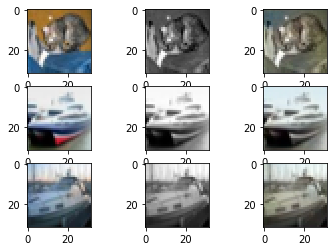

In [38]:
# Displaying the results
fig, axs = plt.subplots(3, 3)
axs[0, 0].imshow(x_test[0])
axs[1, 0].imshow(x_test[1])
axs[2, 0].imshow(x_test[2])

axs[0, 1].imshow(ycrcb_test[0,:,:,0], cmap='gray')
axs[1, 1].imshow(ycrcb_test[1,:,:,0], cmap='gray')
axs[2, 1].imshow(ycrcb_test[2,:,:,0], cmap='gray')

axs[0, 2].imshow(x_pred__[0])
axs[1, 2].imshow(x_pred__[1])
axs[2, 2].imshow(x_pred__[2])